<a href="https://colab.research.google.com/github/roshanc10/Practice_References/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It is used to estimate real values (cost of houses, number of calls, total sales etc.) based on continuous variable(s). Here, we establish relationship between independent and dependent variables by fitting a best line. This best fit line is known as regression line and represented by a linear equation Y= a *X + b.

There are four assumptions associated with a linear regression model:
1.   Linearity: The relationship between X and the mean of Y is linear.
2.   Homoscedasticity: The variance of residual is the same for any value of X.
3.   Independence: Observations are independent of each other.
4.   Normality: For any fixed value of X, Y is normally distributed.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel("/content/sample_data/insurance.xlsx")

data.head(7)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59


In [ ]:
data.shape

(1338, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


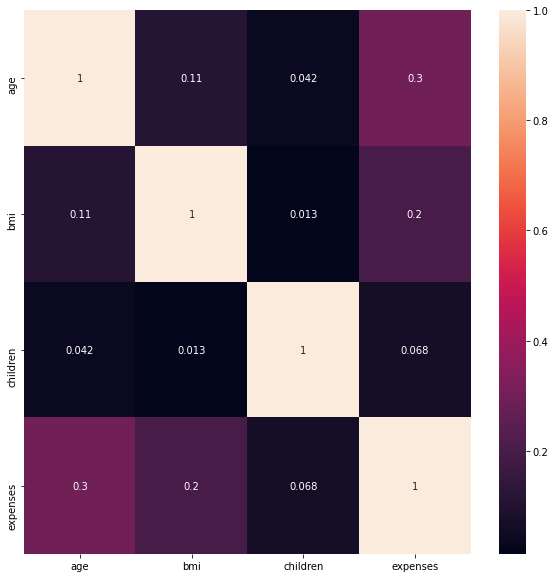

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

corr = data.corr()
sns.heatmap(corr , annot = True , ax=ax)

In [ ]:
import pickle

def save_object(obj , name):
    pickle_obj = open(f"{name}.pck","wb")
    pickle.dump(obj, pickle_obj)
    pickle_obj.close()

In [ ]:
d_types = dict(data.dtypes)
for name , type_ in d_types.items():
    if str(type_) == 'object':
        print(f"<======== {name} ===========>")
        print(data[name].value_counts())
        print()

<======== sex ===========>
male      676
female    662
Name: sex, dtype: int64

<======== smoker ===========>
no     1064
yes     274
Name: smoker, dtype: int64

<======== region ===========>
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



In [ ]:
from sklearn.preprocessing import LabelEncoder

for name , type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])
        save_object(Le , f"Label_Encoder_{name}")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
part = onehotencoder.fit_transform(data['region'].values.reshape(-1,1)).toarray()
save_object(onehotencoder , "OneHotEncoder_region")

values = dict(data["region"].value_counts())

for e , (val , _) in enumerate(values.items()):
    data["region_" + str(val)] = part[:,e]

data = data.drop(["region"] , axis = 1)

data.head()

,age,sex,bmi,children,smoker,expenses,region_2,region_3,region_1,region_0
0,19,0,27.9,0,1,16884.92,0.0,0.0,0.0,1.0
1,18,1,33.8,1,0,1725.55,0.0,0.0,1.0,0.0
2,28,1,33.0,3,0,4449.46,0.0,0.0,1.0,0.0
3,33,1,22.7,0,0,21984.47,0.0,1.0,0.0,0.0
4,32,1,28.9,0,0,3866.86,0.0,1.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   expenses  1338 non-null   float64
 6   region_2  1338 non-null   float64
 7   region_3  1338 non-null   float64
 8   region_1  1338 non-null   float64
 9   region_0  1338 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 104.7 KB


Handle Skewness in Predictive column

In [ ]:
Original_Y = data["expenses"].values.copy()
Original_Y

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36])

Skewness in Column : Expenses  1.51587966289798


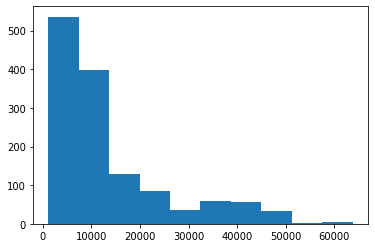

In [ ]:
print("Skewness in Column : Expenses " , data["expenses"].skew())

plt.hist(data["expenses"])
plt.show()

Skewness in Column : Log Expenses  -0.0900974307762623


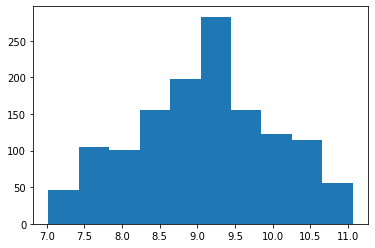

In [ ]:
col_log = np.log(data["expenses"])
print("Skewness in Column : Log Expenses " , col_log.skew())

plt.hist(col_log)
plt.show()

Skewness in Column : Sqrt Expenses  0.7958625295340573


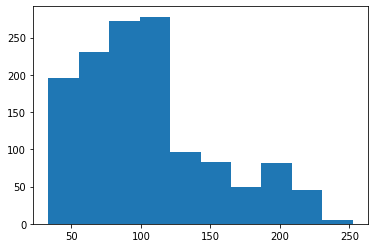

In [ ]:
col_sqrt = np.sqrt(data["expenses"])

print("Skewness in Column : Sqrt Expenses " ,col_sqrt.skew())

plt.hist(col_sqrt)
plt.show()

Skewness in Column : boxcox Expenses  -0.008734062011873602


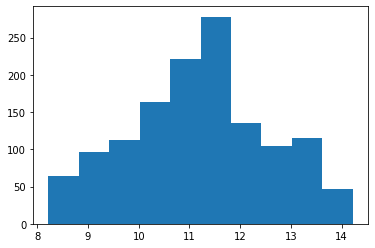

In [ ]:
from scipy import stats 

col_cox , lam = stats.boxcox(data["expenses"])[0:2]
print("Skewness in Column : boxcox Expenses " ,pd.Series(col_cox).skew())
save_object(lam , "boxcox_lambda")

plt.hist(col_cox)
plt.show()

In [ ]:
data["expenses"] = col_cox

In [ ]:
#X = data.iloc[:,:-1].values
#Y = data.iloc[:,-1].values

remaining_columns = list(data.columns)
remaining_columns.remove("expenses")

X = data[remaining_columns].values 
Y = data['expenses'].values

In [ ]:
save_object(remaining_columns , "columns")

In [ ]:
X.shape , Y.shape

((1338, 9), (1338,))

In [ ]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
X = Scaler.fit_transform(X)

for kfold use last after kfold lines

In [ ]:
from sklearn.model_selection import train_test_split 

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)



((1070, 9), (268, 9))

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

save_object(Scaler , "Scaler")

In [ ]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

Xtrain.shape , Xtest.shape

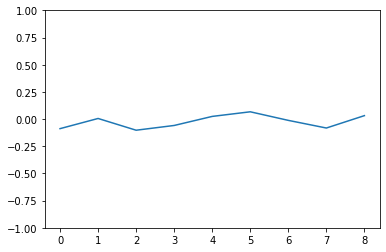

In [ ]:
# check whether data is standardized or not 
# mean should be 1 

plt.ylim(-1,1)

means = []
for i in range(X.shape[1]):
    means.append(np.mean(Xtest[:,i]))
plt.plot(means , scaley=False)

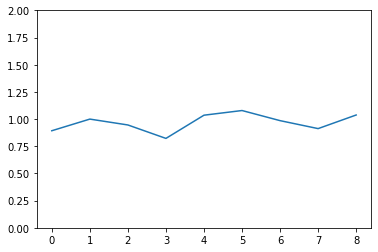

In [ ]:
# Check variances 

plt.ylim(0,2)

vars = []
for i in range(X.shape[1]):
    vars.append(np.var(Xtest[:,i]))
plt.plot(vars)

In [ ]:
#from sklearn.linear_model import LinearRegression

#model = LinearRegression()
#model.fit(Xtrain , Ytrain)

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

model = LinearRegression()
rfecv = RFECV(model , step = 1, min_features_to_select = 4 , n_jobs = -1)
rfecv.fit(Xtrain , Ytrain)

RFECV(cv=None,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=4, n_jobs=-1, scoring=None, step=1, verbose=0)

In [ ]:
rfecv.support_

array([ True, False,  True,  True,  True,  True,  True, False, False])

In [ ]:
rfecv.ranking_

array([1, 4, 1, 1, 1, 1, 1, 2, 3])

In [ ]:
selected_features = np.where(rfecv.support_)[0]
Xtrain = Xtrain[:,selected_features]
Xtest = Xtest[:,selected_features]

In [ ]:
model.fit(Xtrain , Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

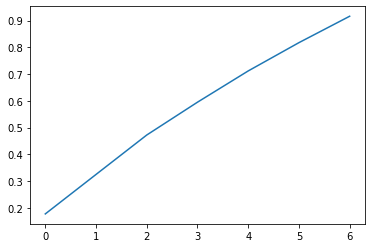

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

pca = PCA(n_components = 7)
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest)
 
plt.plot(pca.explained_variance_ratio_.cumsum())

save_object(pca , "PCA")

In [ ]:
model = LinearRegression()
model.fit(Xtrain , Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Ypred = model.predict(Xtest)

print("rmse_score : " , rmse_score(Ytest , Ypred))
print("r2_score : " , r2_score(Ytest , Ypred))
print("mae : " , mae(Ytest , Ypred))
print("adj_r2_score : " , adj_r2_score(Ytest , Ypred , Xtest.shape[1]))

rmse_score :  0.6817554906479537
r2_score :  0.7497119096615366
mae :  0.42150203685060006
adj_r2_score :  0.7429733841524241


save the model into pickle file

In [ ]:
save_object(model , "MyModel")

In [ ]:
model.coef_

array([ 0.17164153,  0.08197176,  0.02232378,  0.43355789,  0.54318205,
       -0.29099124,  0.94352298])

In [ ]:
model.intercept_

11.221776259503466

In [ ]:
# Y = W.X + c
model.coef_.dot(Xtest[10,:]) + model.intercept_

9.853713595940008

Inbuilt method predict

In [ ]:
model.predict(Xtest[10,:].reshape(1,-1))

array([9.8537136])

In [ ]:
model.score(Xtest , Ytest)

0.7497119096615367

In [ ]:
from scipy.special import inv_boxcox

transformed_data = inv_boxcox(Y , lam)

In [ ]:
transformed_data[:10]

array([16884.92,  1725.55,  4449.46, 21984.47,  3866.86,  3756.62,
        8240.59,  7281.51,  6406.41, 28923.14])

In [ ]:
Original_Y[:10]

array([16884.92,  1725.55,  4449.46, 21984.47,  3866.86,  3756.62,
        8240.59,  7281.51,  6406.41, 28923.14])

KFolds cross validation to gain confidence from our training dataset

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA 

pca = PCA(n_components = 7)
X = pca.fit_transform(X)

pca.explained_variance_ratio_.cumsum()

array([0.17443158, 0.32284686, 0.46979121, 0.59049392, 0.70795154,
       0.81403557, 0.91668333])

In [ ]:
from sklearn.model_selection import KFold 

k_fold = KFold(n_splits=5)

test_scores = []
for train_idx , test_idx in k_fold.split(X):
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    Xtest = X[test_idx]
    Ytest = Y[test_idx]

    model = LinearRegression()
    model.fit(Xtrain , Ytrain)

    test_scores.append(model.score(Xtest , Ytest))

mean score of model accuracy

 mean score of k folds :  0.7668904952811475


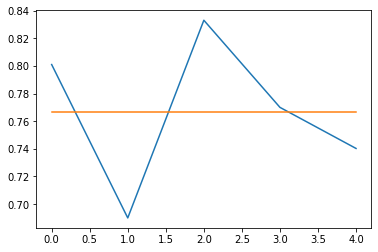

In [ ]:
print(" mean score of k folds : " , np.mean(test_scores))

plt.plot(test_scores)
plt.plot([np.mean(test_scores)]*len(test_scores))
plt.show()

Previously we got a score of 0.7497119096615367 and now in kfold we get an mean score of 0.7668904952811475 which is better.

Can we Bring back the data?

In [ ]:
from scipy.special import inv_boxcox

Real_data = inv_boxcox(Y , lam)

In [ ]:
Real_data[:10]

array([16884.92,  1725.55,  4449.46, 21984.47,  3866.86,  3756.62,
        8240.59,  7281.51,  6406.41, 28923.14])

In [ ]:
Original_Y[:10]

array([16884.92,  1725.55,  4449.46, 21984.47,  3866.86,  3756.62,
        8240.59,  7281.51,  6406.41, 28923.14])

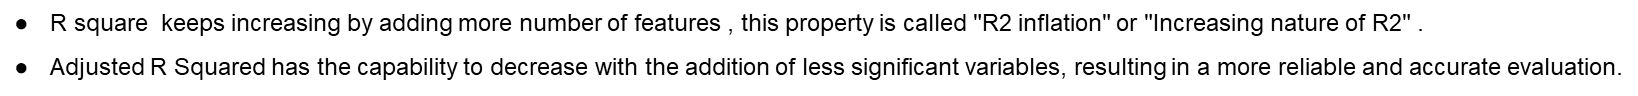

In [ ]:
def rmse_score(y_test , y_pred):
    value = (1/len(y_test))*np.sum((y_test - y_pred)**2)
    return np.sqrt(value)

def r2_score(y_test , y_pred):
    ssr = (1/len(y_test))*np.sum((y_test - y_pred)**2)
    sst = (1/len(y_test))*np.sum((y_test - np.mean(y_test))**2)
    return (1 - (ssr/sst))

def mae(y_test , y_pred):
    return (1/len(y_test))*np.sum(np.abs(y_test - y_pred))

def adj_r2_score(y_test , y_pred , n_features):
    numerator = (1-r2_score(y_test , y_pred))*(len(y_test) - 1)
    denominator = len(y_test) - n_features - 1
    return 1 - (numerator/denominator)

 Average RMSE  0.6553523743325529


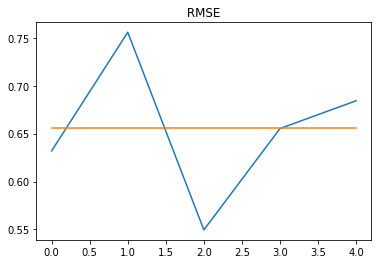

 Average MAE  0.4131142149084163


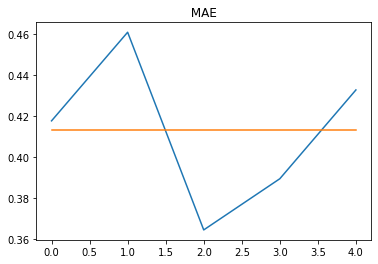

 Average R square  0.7668904952811475


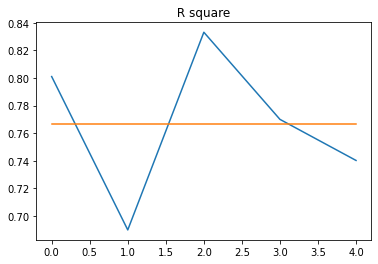

 Average Adj R square  0.7606042897747062


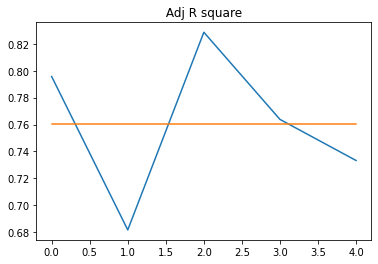

In [ ]:
k_fold = KFold(n_splits=5)

# Plotting Root mean squared error 
rmse_scores = []
r2_scores = []
mae_scores = []
r2_adj_scores = []

for train_idx , test_idx in k_fold.split(X):
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    Xtest = X[test_idx]
    Ytest = Y[test_idx]

    model = LinearRegression()
    model.fit(Xtrain , Ytrain)

    Ypred = model.predict(Xtest)
    rmse_scores.append(rmse_score(Ytest , Ypred))
    r2_scores.append(r2_score(Ytest , Ypred))
    mae_scores.append(mae(Ytest , Ypred))
    r2_adj_scores.append(adj_r2_score(Ytest , Ypred , Xtest.shape[1]))

print(" Average RMSE " , np.mean(rmse_scores))
plt.plot(rmse_scores)
plt.plot([np.mean(rmse_scores)]*len(rmse_scores))
plt.title(" RMSE ")
plt.show()

print(" Average MAE " , np.mean(mae_scores))
plt.plot(mae_scores)
plt.plot([np.mean(mae_scores)]*len(mae_scores))
plt.title(" MAE ")
plt.show()

print(" Average R square " , np.mean(r2_scores))
plt.plot(r2_scores)
plt.plot([np.mean(r2_scores)]*len(r2_scores))
plt.title(" R square ")
plt.show()

print(" Average Adj R square " , np.mean(r2_adj_scores))
plt.plot(r2_adj_scores)
plt.plot([np.mean(r2_adj_scores)]*len(r2_adj_scores))
plt.title(" Adj R square ")
plt.show()

Predicting real time values with saved model

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
# Values 
# Label Encoding 
# OneHotEncoding 
# Scaler 
# PCA
# Predict
# Inverse Boxcox

In [ ]:
def load_object(name):
    pickle_obj = open(f"{name}.pck","rb")
    obj = pickle.load(pickle_obj)
    return obj

In [ ]:
# Load the Data Point 

data = pd.read_excel("/content/sample_data/insurance.xlsx")

idx = np.random.choice(len(data))
to_be_predicted = data.iloc[idx,:].values

col_names = data.columns 
predict_dict = {}

for col_name , val in zip(col_names , to_be_predicted):
    predict_dict[col_name] = val

print(predict_dict)

{'age': 43, 'sex': 'male', 'bmi': 35.0, 'children': 1, 'smoker': 'yes', 'region': 'northeast', 'expenses': 41034.22}


In [ ]:
real_value = predict_dict["expenses"]
del predict_dict["expenses"]

In [ ]:
predict_dict["region"] = load_object("Label_Encoder_region").transform(np.array(predict_dict["region"]).reshape(-1,))

In [ ]:
predict_dict["sex"] = load_object("Label_Encoder_sex").transform(np.array(predict_dict["sex"]).reshape(-1,))[0]

In [ ]:
predict_dict["smoker"] = load_object("Label_Encoder_smoker").transform(np.array(predict_dict["smoker"]).reshape(-1,))[0]

In [ ]:
predict_dict

{'age': 43,
 'bmi': 35.0,
 'children': 1,
 'region': array([0]),
 'sex': 1,
 'smoker': 1}

In [ ]:
predict_dict["region_ohe"] = load_object("OneHotEncoder_region").transform(predict_dict["region"].reshape(-1,1)).toarray()[0]
predict_dict

{'age': 43,
 'bmi': 35.0,
 'children': 1,
 'region': array([0]),
 'region_ohe': array([1., 0., 0., 0.]),
 'sex': 1,
 'smoker': 1}

In [ ]:
del predict_dict["region"]

In [ ]:
for e , i in enumerate(predict_dict["region_ohe"]):
    predict_dict["region_" + str(e)] = i

In [ ]:
del predict_dict["region_ohe"]
predict_dict

{'age': 43,
 'bmi': 35.0,
 'children': 1,
 'region_0': 1.0,
 'region_1': 0.0,
 'region_2': 0.0,
 'region_3': 0.0,
 'sex': 1,
 'smoker': 1}

In [ ]:
# Lets make the main array 

col_sequence = load_object("columns")
array = []

for col_name in col_sequence :
    array.append(predict_dict[col_name])

array = np.array(array)

print(array)

[43.  1. 35.  1.  1.  0.  0.  0.  1.]


In [ ]:
array = load_object("Scaler").transform(array.reshape(1,-1))
array = load_object("PCA").transform(array)
array

array([[ 0.56605498,  1.97891383, -0.4405987 ,  1.86144364,  0.05383977,
        -0.87961778,  0.7551423 ]])

In [ ]:
prediction = load_object("MyModel").predict(array)
print(prediction)

[13.27605757]


In [ ]:
from scipy.special import inv_boxcox

prediction = inv_boxcox(prediction , load_object("boxcox_lambda"))

print(prediction)

[35318.83363468]


In [ ]:
print(" Original " , real_value , " , Predicted " , float(prediction[0]))

 Original  41034.22  , Predicted  35318.83363467916
